# Musical Data Analysis


*   API used: Spotify
*   Author: Purva Natoo



##### Install necessary libraries

In [ ]:
!pip install spotipy

##### Import libraries

In [145]:
import json
import spotipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spotipy.oauth2 import SpotifyClientCredentials

## Data Extraction

###### Setup credentials

In [ ]:
cid = 'XXXXXXX'
csec = 'XXXXXXXXX'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=csec)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

###### Make API call and get data

In [ ]:
artists_name = []
popularity= []
track_name = []
track_id = [] 
track_duration = []
track_danceability = []
track_energy = []
track_loudness = []
track_speechiness = []
track_acousticness = []
track_instrumentalness = []
track_liveness = []
track_tempo = []

total_tracks = 0;
offset = 0;

track_results = sp.search(q='year:2021', type='track', market='IN', limit=50)
#Get total tracks in the list
total_tracks = track_results['tracks']['total']

while offset<=total_tracks and offset<1000:
  track_results = sp.search(q='year:2021', type='track', market='IN', limit=50, offset=offset)
  
  if offset==0:
    total_tracks = track_results['tracks']['total']
  
  for track in track_results['tracks']['items']:
    track_name.append(str(track['name']))
    popularity.append(int(track['popularity']))
        
    artists = ''
    for artist in track['artists']:
      artists = artists + ", " + str(artist['name'])
      artists = artists.strip(" , ")
    artists_name.append(str(artists))

    id = track['id']
    track_id.append(str(id))
    
  offset = offset+50

#Get audio details for all tracks
total_tracks = len(track_id)
offset = 0;
while (offset + 100)<=total_tracks:
  track_details = sp.audio_features(tracks=track_id[offset:offset+100])
  for detail in track_details:
    track_danceability.append(float(detail['danceability']))
    track_energy.append(float(detail['energy']))
    track_duration.append(int(detail['duration_ms']))
    track_speechiness.append(float(detail['speechiness']))
    track_acousticness.append(float(detail['acousticness']))
    track_instrumentalness.append(float(detail['instrumentalness']))
    track_liveness.append(float(detail['liveness']))
    track_loudness.append(float(detail['loudness']))
    track_tempo.append(float(detail['tempo']))

  offset = offset + 100


### Data Cleaning

In [ ]:
data = {
    'Name' : track_name,
    'Track ID': track_id,
    'Artist Name': artists_name,
    'Popularity': popularity,
    'Danceability': track_danceability,
    'Energy': track_energy,
    'Duration': track_duration,
    'Speechiness': track_speechiness,
    'Acousticness': track_acousticness,
    'Instrumentalness': track_instrumentalness,
    'Liveness': track_liveness,
    'Loudness': track_loudness,
    'Tempo': track_tempo
}
df = pd.DataFrame(data)
df.head()

,Name,Track ID,Artist Name,Popularity,Danceability,Energy,Duration,Speechiness,Acousticness,Instrumentalness,Liveness,Loudness,Tempo
0,"Raataan Lambiyan (From ""Shershaah"")",2rOnSn2piaqLAlYjtfUBlY,"Tanishk Bagchi, Jubin Nautiyal, Asees Kaur",84,0.720,0.630,230292,0.0413,0.615,0.00000,0.1080,-5.549,81.009
1,Medley Picaflor de Los Andes - Live Streaming ...,5PraiQQAIkl0xw6pSFVX5h,Amaranta,23,0.459,0.693,1035421,0.2540,0.238,0.00000,0.9310,-10.440,136.397
2,DESIRES,5pcmtf1lwrMqmAWWm248fY,"AP Dhillon, Gurinder Gill, Various Artists",84,0.863,0.387,168000,0.2560,0.365,0.00238,0.0600,-10.057,100.013
3,Jugnu,0R3eS8D2N2N4HH5fJ2mp87,"Badshah, Nikhita Gandhi",26,0.720,0.786,230400,0.0413,0.026,0.00000,0.0819,-5.214,124.970
4,"Ranjha (From ""Shershaah"")",72zHuDxFQTjbL51qJQSA7j,"Jasleen Royal, B Praak, Romy, Anvita Dutt",82,0.603,0.573,228855,0.0502,0.478,0.00000,0.0971,-5.843,82.941


### Visualize Data - EDA

###### Mean value of audio features - Bargraph

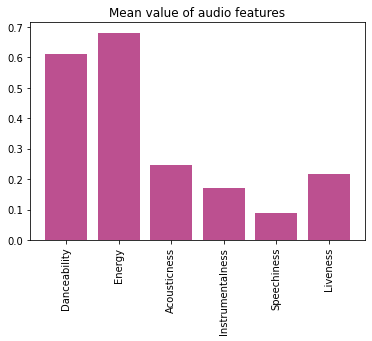

In [ ]:
mean_data = {
    'Mean': [df['Danceability'].mean(), df['Energy'].mean(), df['Acousticness'].mean(), df['Instrumentalness'].mean(), df['Speechiness'].mean(), df['Liveness'].mean()],
    'Features': ['Danceability', 'Energy', 'Acousticness', 'Instrumentalness', 'Speechiness', 'Liveness']
}
mean_df = pd.DataFrame(mean_data)

plt.xticks(rotation='vertical')
plt.title('Mean value of audio features')
plt.bar(mean_df['Features'], mean_df['Mean'], color='#bc5090')
plt.show()

###### Popularity vs Duration

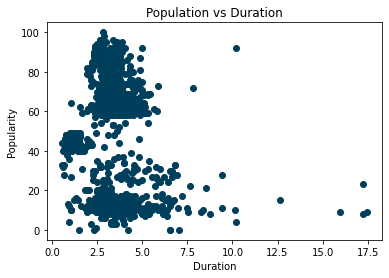

In [ ]:
plt.scatter(df['Duration']/60000, df['Popularity'], c='#003f5c')
plt.title('Population vs Duration')
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

###### Heat Map

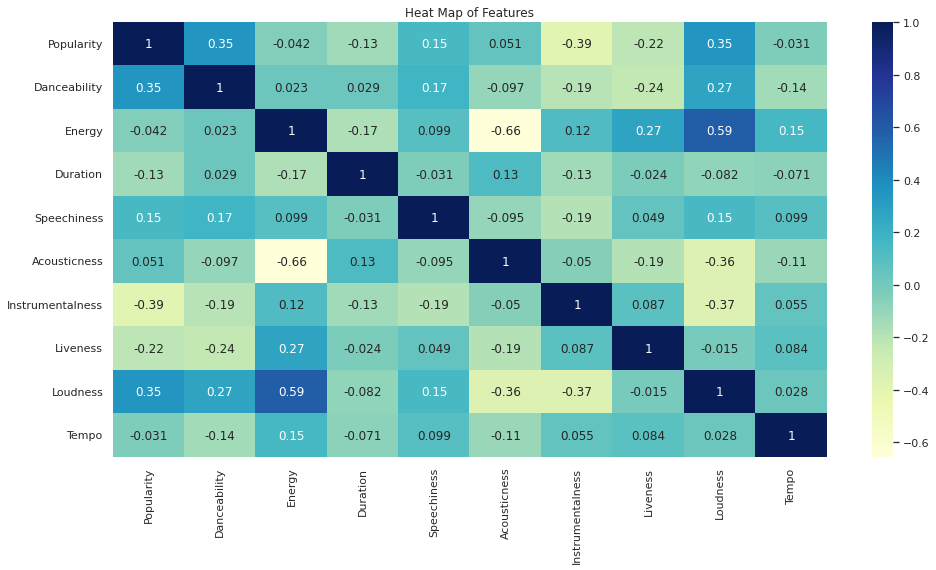

In [148]:
plt.figure(figsize=(16, 8))
plt.title("Heat Map of Features")
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")
plt.show()

###### Top 10 Popular Songs

Text(0.5, 0, 'Song Title')

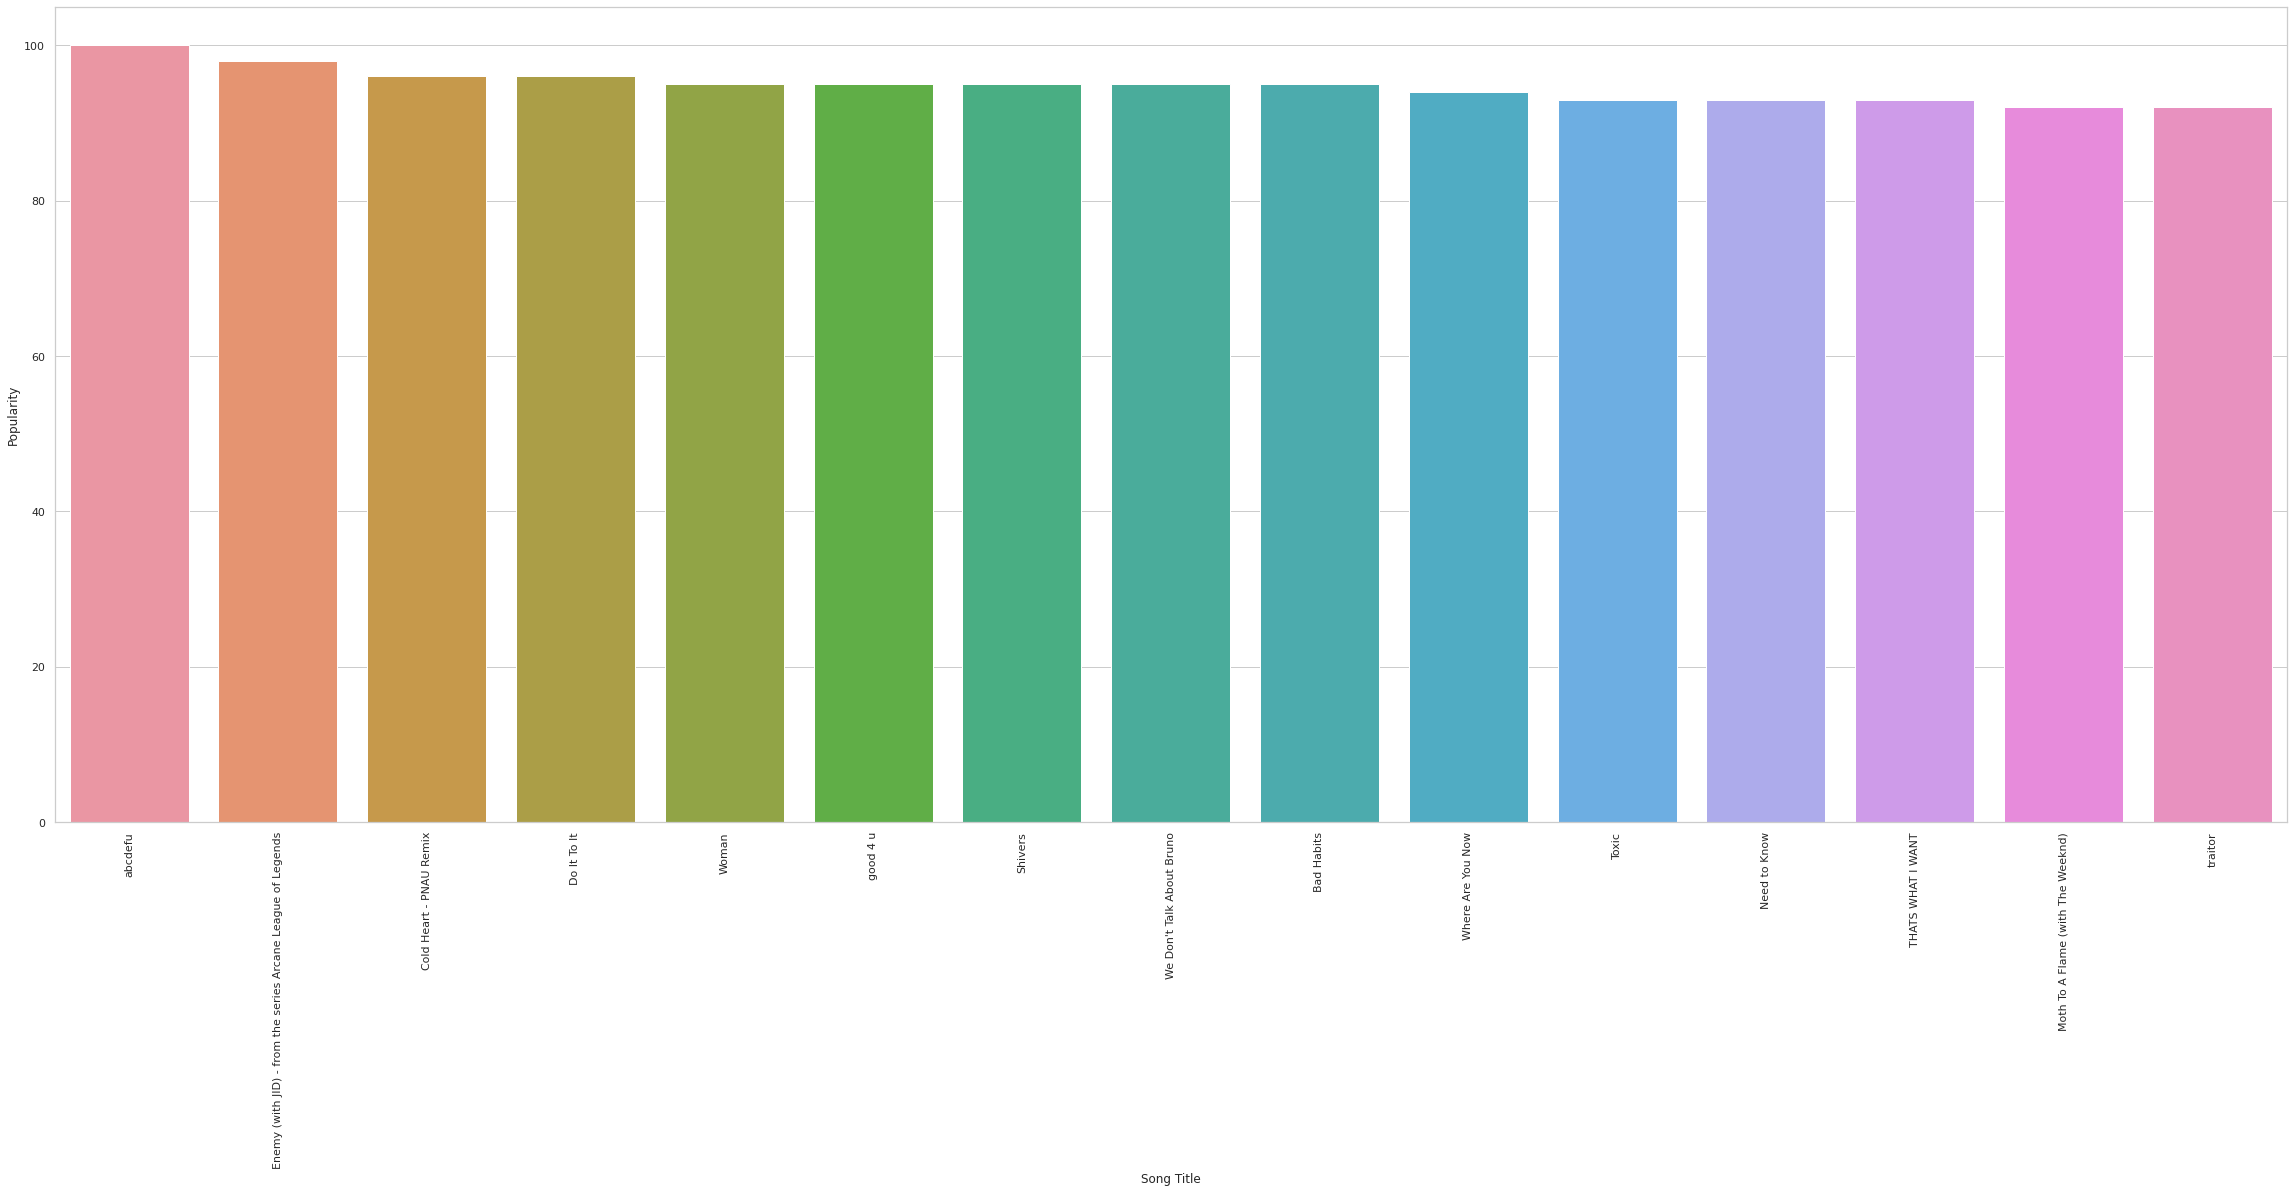

In [156]:
plt.figure(figsize=(40, 15))
plt.xticks(rotation='vertical')
sns.set(style="whitegrid")

# group by the song's name and rank them base on their popularity
x = df.groupby("Name")["Popularity"].mean().sort_values(ascending=False).head(15)
axis = sns.barplot(x=x.index, y=x)

axis.set_ylabel('Popularity')
axis.set_xlabel('Song Title')

### Conclusions




1.   A song tends to be more popular when the duration is in between 2 to 5 mins
2.   Loudness is strongly correlated with energy. Loud songs can be high in energy but are not necessarily good for dancing
3. Acoustic is the least correlated with the popularity which is quite understandable. People generally do not prefer listening to songs just played by the orchestra

